In [3]:
# HIDDEN
#Importing packages
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import patches
%matplotlib inline

# Environmental Kuznets Curve Hypothesis

The Environmental Kuznets curve hypothesis that the economic development of a nation is associated with a downward-facing U-shape.  The Y-axis is in terms of the level of environmental degradation (e.g pollution, water quality, deforestation.  The X-axis would be the GDP/capita.  The idea is that the environmental degradation worsens, until a certain level of income, and after which it gets better. In the US this could be seen in terms of air or water quality, where the skies or rivers were very polluted in the 1960s, until the Clean Air Act and Clean Water Act were passed and Air Quality and Water Quality improved.  Another motivation for the downward slope would be the idea that at some point a wealthier society demands environmental improvements.  
However - could this hold for the potentially most important Pollutant C02, the main driver of anthropogenic climate change.  Controversially the impacts of global CO2 pollution are not experienced locally, but are experienced as global effects. So it is not clear whether the Environmental Kuznets hypothesis will hold.  

Today, we'll look to build an C02 Kuznets Curve (as below) for an *association* between the amount of CO2 emitted per capita (t/CO2) and the growing GDP per capita (USD). This dataset is collected from Our World in Data, a great source of all sorts of data types!



![kuznets.png](kuznets.png)

## Building our own Environmental Kuznets Curve


We start by importing data on GDP per capita and Per Capita CO2 emissions for every country in the world for as long as it has been recorded.

In [4]:
co2_table = Table.read_table('co2-emissions-vs-gdp.csv').drop('145446-annotations','Total population (Gapminder, HYDE & UN)','Code')
co2_table = co2_table.relabeled('Entity', 'Country')
co2_table

Country,Year,Per capita CO2 emissions,GDP per capita,Continent
Abkhazia,2015,nan,nan,Asia
Afghanistan,1949,0.00191237,nan,nan
Afghanistan,1950,0.010871,1156,nan
Afghanistan,1951,0.0116837,1170,nan
Afghanistan,1952,0.0115423,1189,nan
Afghanistan,1953,0.0132159,1240,nan
Afghanistan,1954,0.0130359,1245,nan
Afghanistan,1955,0.0186057,1246,nan
Afghanistan,1956,0.0218121,1278,nan
Afghanistan,1957,0.0343433,1253,nan


### Low Income Countries  
Let's start by selecting a set of Low Income Countries to graph a scatter plot on the movement of CO2 intensity per capita based on GDP per capita.

<Figure size 4500x3000 with 0 Axes>

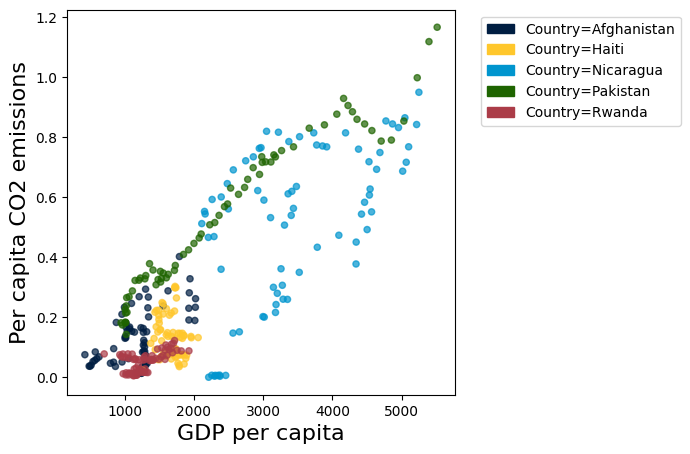

In [5]:
#Low-Income Nations
LIH_array = make_array('Haiti', 'Afghanistan','Rwanda','Pakistan', 'Nicaragua')
LIH_table = co2_table.where('Country', are.contained_in(LIH_array))
LIH_table = LIH_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
plt.figure(figsize = (18,12), dpi=250)
LIH_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Country') 

Note that each dot represents a nation at a given level of emissions and GDP per capita

With these three countries we see a few different stories:
 - In Afghanistan, Haiti and Rwanda we see little income growth and little CO2 intensity growth with a slight upward trend
 - In Nicaragua we see some jumping around, in fact Nicaragua GDP per capita has gone up and down, as has CO2 per capita
 - In Pakistan, a larger and more populous country we see strong linear upward growth in both GDP per capita and CO2 per capita, with no signs of turning down

In these countries it is hard to tell the complete story without the exact time trend.


### BRICS  
Let's plot a similar scatter plot to examine some of the BRICS countries (rapidly growing upper middle income countries).

<Figure size 4500x3000 with 0 Axes>

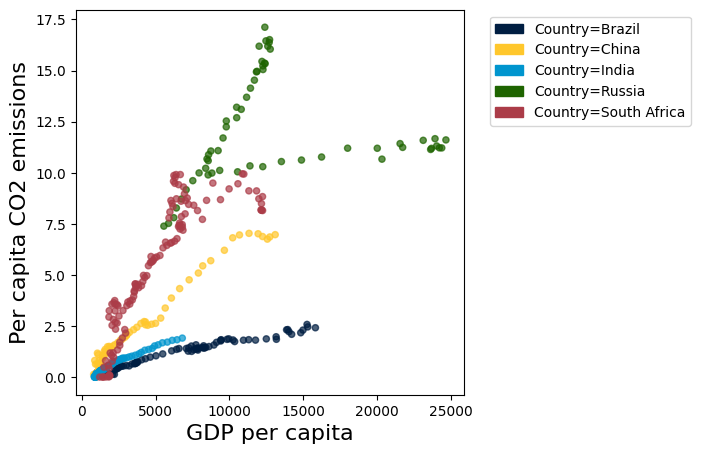

In [6]:
BRICS_array = make_array('Brazil','Russia','India','China','South Africa')
BRICS_table = co2_table.where('Country', are.contained_in(BRICS_array))
BRICS_table = BRICS_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
plt.figure(figsize = (18,12), dpi=250)
BRICS_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Country')

The BRICS nations seem to have a variety of development pathways but all show the linear trend of increasing emissions as wealth grows.  
- Russia has an interesting dip while GDP per capita decrease and then increase again
- South Africa has a recent period where growth in both GDP per capita and CO2 per capita have stagnated
- China and India show linearly increasing trends, with China both wealthier and more CO2 intensive

## Individual country graphs
Let's look at some individual countries, starting with the United States.   
We can plot both total and logged quantities on a scatter plot:

### United States

<Figure size 4500x3000 with 0 Axes>

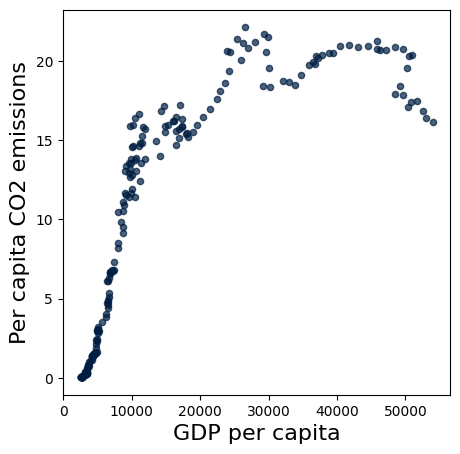

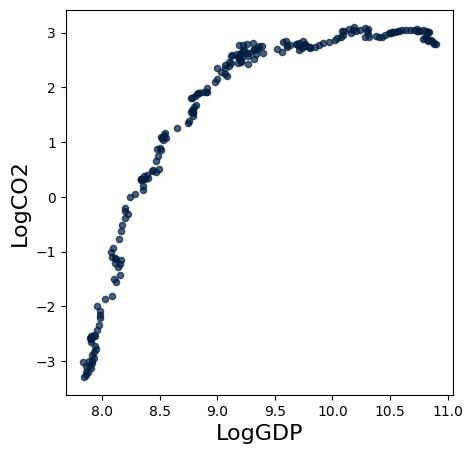

<Figure size 4500x3000 with 0 Axes>

In [7]:
#US Example + LOG
US_table = co2_table.where('Country', 'United States').where('Year', are.between(1800,2018))
US_table = US_table.with_column('LogGDP', np.log(US_table.column('GDP per capita'))).with_column('LogCO2',np.log(US_table.column('Per capita CO2 emissions')))
US_table.scatter('GDP per capita', 'Per capita CO2 emissions')
US_table.scatter('LogGDP', 'LogCO2')
plt.figure(figsize = (18,12), dpi=250)

**Looks like we have a curve!**

In the case of the US it does indeed look like the C02 per capita does indeed start to deline after about $40,000
Somewhere around 2000-2004 the CO2 emissions leveled off and then began to decline.


### China

In COP26, China has been a large part of the discussion (and emissions). Let's have a look at their scatter plot!

<Figure size 4500x3000 with 0 Axes>

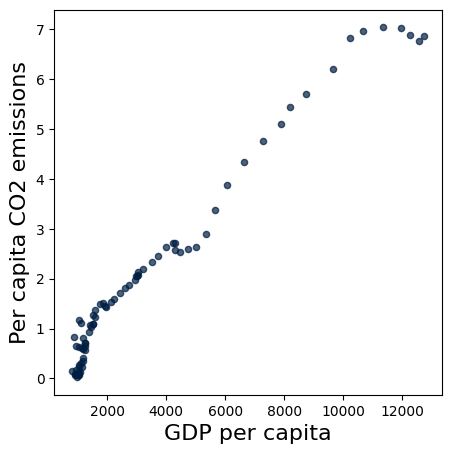

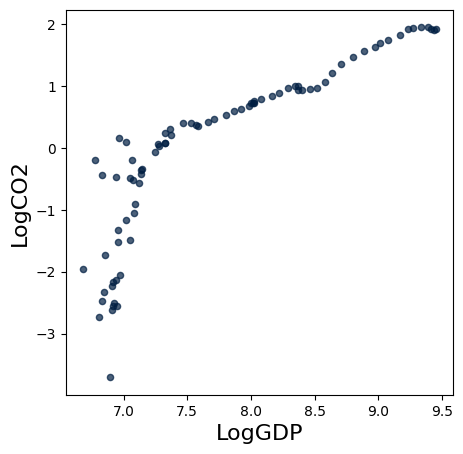

<Figure size 4500x3000 with 0 Axes>

In [9]:
#China Example + LOG
NO_table = co2_table.where('Country', 'China').where('Year', are.between(1800,2018))
NO_table = NO_table.with_column('LogGDP', np.log(NO_table.column('GDP per capita'))).with_column('LogCO2',np.log(NO_table.column('Per capita CO2 emissions')))
NO_table.scatter('GDP per capita', 'Per capita CO2 emissions')
NO_table.scatter('LogGDP', 'LogCO2')
plt.figure(figsize = (18,12), dpi=250)

Indeed it appears that China has an inflection point and is starting to level off in the Carbon intensity per capita


### India

What about India's scatter plot?

<Figure size 4500x3000 with 0 Axes>

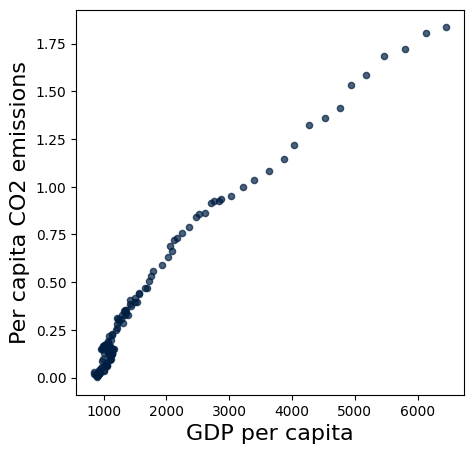

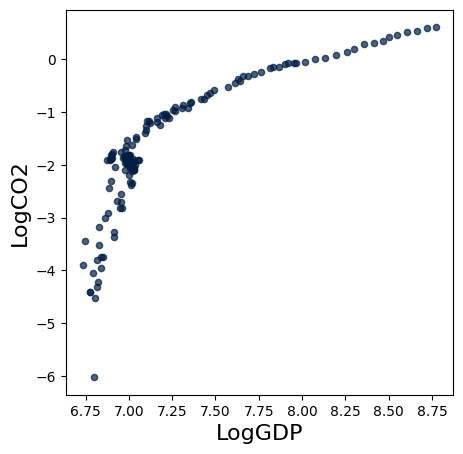

<Figure size 4500x3000 with 0 Axes>

In [10]:
#India Example + LOG
NO_table = co2_table.where('Country', 'India').where('Year', are.between(1800,2018))
NO_table = NO_table.with_column('LogGDP', np.log(NO_table.column('GDP per capita'))).with_column('LogCO2',np.log(NO_table.column('Per capita CO2 emissions')))
NO_table.scatter('GDP per capita', 'Per capita CO2 emissions')
NO_table.scatter('LogGDP', 'LogCO2')
plt.figure(figsize = (18,12), dpi=250)

Let's look at a set of other High Income Nations:

<Figure size 4500x3000 with 0 Axes>

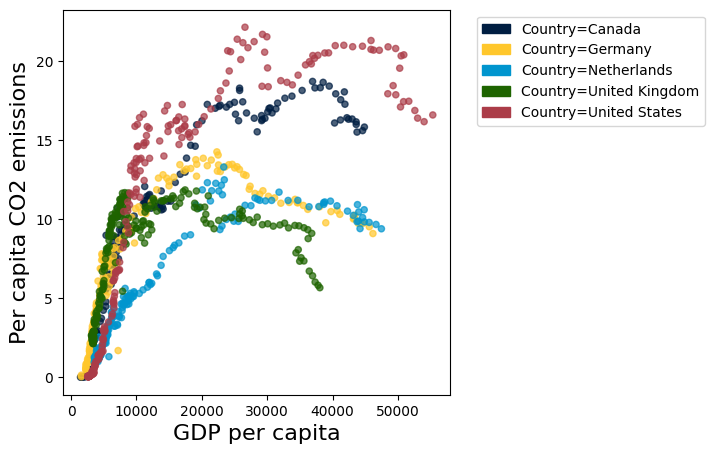

<Figure size 4500x3000 with 0 Axes>

In [12]:
HIN_array = make_array('United States', 'Netherlands', 'United Kingdom','Germany','Canada')
HIN_table = co2_table.where('Country', are.contained_in(HIN_array))
HIN_table = HIN_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
HIN_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Country')
plt.figure(figsize = (18,12), dpi=250)

As in the US and Norway, these nations have experienced a boom, stagnation, and now to some extent a downward trend. Let's finally plot all the previously observed nations together in one singular scatter plot:

<Figure size 4500x3000 with 0 Axes>

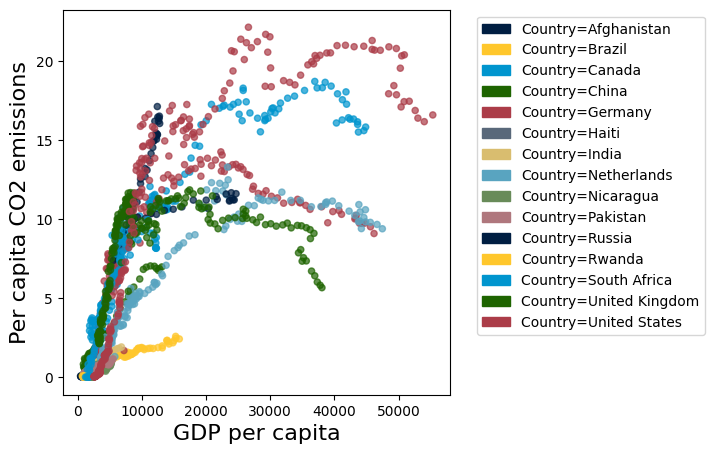

<Figure size 4500x3000 with 0 Axes>

In [13]:
ALL_array = np.append((np.append(LIH_array,BRICS_array)), HIN_array)
ALL_table = co2_table.where('Country', are.contained_in(ALL_array))
ALL_table = ALL_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
ALL_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Country')
plt.figure(figsize = (18,12), dpi=250)

Here we see evidence for an Environmental Kuznets Curve.

It seems, at least to some extent, that as nations develop economically, the level of environmental degradation reaches a peak and then declines, mapping a downward-facing U-curve. 

## Criticism of the Environmental Kuznets Curve Hypothesis

Some questions we ought to ask ourselves in the end are:
* Do all types of environmental degradation follow the curve? What if we plot Energy, Land, & Resource usage?
* What we plotted today shows the ratio between GDP and CO2 per capita, but what about the *absolute* numbers of emissions?
* What is the true long-term shape of the curve? Could it reshape itself to an "N" as an economy passes a certain threshold?
* What about its applicability on a global scale? Knowing that the HINs have a habit of exporting pollution to LINs, what will happen as LIN grow economically?

These are just some questions environmental economists have asked themselves throughout the years since the curve was hypothesized in 1955. Some, including Perman and Stern (2003) conclude that the level of environmental degradation has much more to do with a constant "battle" between scale and time than income alone. As nations scale up (BRICS, for instance) the growth results in higher emissions, while countries with lower growth (LIN & HIN) seem more influenced by the "time-effect", which results in lower emissions. Others, among Krueger & Grossman, argue that there is "no evidence that environmental quality deteriorates steadily with economic growth."

More on these theories can be found in the recommended readings below.

As data scientists motivated to help heal the plant with the tools of environmental economics, we can help to find these answers!


## What's next?

If you are interested in this area, there are even more fascinating applications of Data Science to environmental topics such as: finding the social cost of carbon, the valuation of our environment, and the economics of emissions trading. Besides purely economical modeling, the field of environmental data science is rapidly growing as we collect more and more data on our planet and its resources. Applying the power of Satellite Imagery, Machine Learning, and Geographic Information Systems (GIS), one can follow both technology and policy-based paths, both ensured to have a positive impact in shaping a data-driven, sustainable future.

## Further recommended readings

Levelized Cost of Carbon Abatement: An Improved Cost-Assessment Methodology for a Net-Zero Emissions World (also the main source of this Jupyter Notebook)

https://www.energypolicy.columbia.edu/sites/default/files/file-uploads/LCCA_CGEP-Report_101620.pdf

Dynamic vs. Static costs are described further in K.Gillingham & J.H Stock's The Cost of Reducing Greenhouse Gas Emissions (italic) from 2018. - A highly recommended reading out of scope for this class.

https://scholar.harvard.edu/files/stock/files/gillingham_stock_cost_080218_posted.pdf

Goldman Sachs Research: Carbonomics: The Future of Energy in the Age of Climate Change
  
https://www.goldmansachs.com/insights/pages/carbonomics.html

EPA article on the Economics of Climate Change:
https://www.epa.gov/environmental-economics/economics-climate-change

Draw your own curve program:
https://tamc.github.io/macc/

Abatement curve for crops:
https://github.com/aj-sykes92/ggmacc/blob/main/README_files/figure-gfm/full-macc-1.png


Aalborg University's software:
https://github.com/matpri/EPLANoptMAC
